In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from re import sub

In [3]:
os.chdir('C:/Bhushan data/ETLHIVE (India@123)/ETLHIVE Deep Learning/08_Text_Processing_2_18-Jun-23')

In [4]:
A = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
A.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
Y = A[['Liked']]

In [6]:
q= []
for i in A['Review']:
    i = sub('[^a-zA-Z0-9 ]','',i)
    q.append(i.upper())

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [8]:
Xnew = cv.fit_transform(q).toarray()

In [9]:
len(cv.get_feature_names())

2067

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)

In [11]:
nn = Sequential()

In [12]:
nn.add(Dense(2070, input_dim = len(cv.get_feature_names())))
nn.add(Dense(300))
nn.add(Dropout(rate=0.2))
nn.add(Dense(300))
nn.add(Dropout(rate=0.2))
nn.add(Dense(1, activation='sigmoid'))

In [13]:
nn.compile(loss='binary_crossentropy',metrics='accuracy')

In [14]:
model = nn.fit(Xnew,Y, validation_split=0.2,epochs=50,callbacks=es)

Epoch 1/50
25/25 [==============================] - 2s 69ms/step - loss: 0.5834 - accuracy: 0.7113 - val_loss: 0.5294 - val_accuracy: 0.7450
Epoch 2/50
25/25 [==============================] - 1s 58ms/step - loss: 0.2384 - accuracy: 0.9000 - val_loss: 0.6353 - val_accuracy: 0.7600
Epoch 3/50
25/25 [==============================] - 1s 58ms/step - loss: 0.0881 - accuracy: 0.9638 - val_loss: 0.7260 - val_accuracy: 0.8000
Epoch 4/50
25/25 [==============================] - 1s 59ms/step - loss: 0.0331 - accuracy: 0.9875 - val_loss: 1.6564 - val_accuracy: 0.7100
Epoch 5/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 1.6308 - val_accuracy: 0.7650
Epoch 6/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0110 - accuracy: 0.9925 - val_loss: 1.7018 - val_accuracy: 0.8200
Epoch 7/50
25/25 [==============================] - 2s 62ms/step - loss: 0.0057 - accuracy: 0.9975 - val_loss: 1.9095 - val_accuracy: 0.7950
Epoch 8/50
25

In [15]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

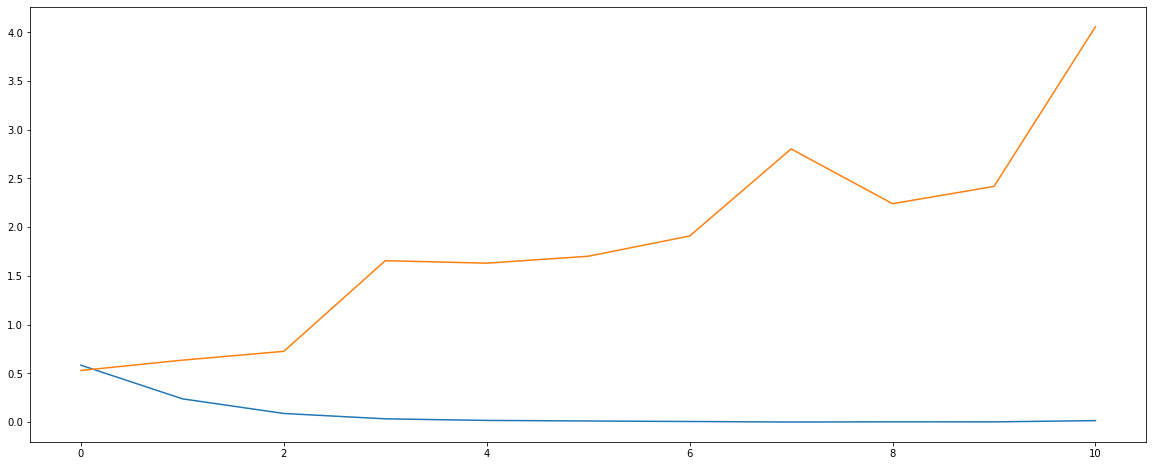

In [16]:
plt.figure(figsize=(20,8))
plt.plot(tr_err)
plt.plot(ts_err)

In [40]:
B = pd.read_csv('rest_reviews_testing.csv')
B.head()

,Review
0,Tasty and delicious
1,crust is hard
2,yummy....I like Dominos pizza
3,fast service and good taste
4,Good taste


In [41]:
p = []
for i in B['Review']:
    i = sub('^a-zA-Z0-9','',i)
    p.append(i.upper())

In [42]:
p

['TASTY AND DELICIOUS',
 'CRUST IS HARD',
 'YUMMY....I LIKE DOMINOS PIZZA',
 'FAST SERVICE AND GOOD TASTE',
 'GOOD TASTE ',
 'ITS VERY DELICIOUS... HOPE IT WILL MAINTAIN TAST...',
 'FOOD WAS OKAY BUT THE CHEESY DIP PROVIDED WAS EXPIRED.',
 'TASTE IS OK BUT NOT SATISFIED',
 'POOR SERVICE ',
 'GOOD HYGIENE FOOD DELIVERED BY DOMINOS WITH PROPER SAFETY.',
 'NOT GOOD',
 'TASTE IS NOT OK ALSO SERVICE IS NOT SATISFIED',
 'DELAYED SERVICE',
 'HORRIBLE TASTE',
 'LATE SERVICE',
 "TASTE IS OK BUT DELIVERY IS TOO LATE..CAN'T SPEND THAT MUCH TIME",
 'DISAPPOINTING FOOD EXPERIENCE']

In [43]:
Xtest = cv.transform(p).toarray()

In [44]:
Xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
pred = nn.predict(Xtest)

1/1 [==============================] - 0s 25ms/step


In [46]:
output = []
for i in pred:
    if i>0.5:
        output.append(1)
    else:
        output.append(0)
output

[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [55]:
O = B[['Review']]

In [56]:
O['like'] = output

In [57]:
O

,Review,like
0,Tasty and delicious,1
1,crust is hard,0
2,yummy....I like Dominos pizza,1
3,fast service and good taste,1
4,Good taste,1
5,Its very delicious... hope it will maintain ta...,1
6,Food was okay but the cheesy dip provided was ...,0
7,taste is ok but not satisfied,0
8,Poor service,0
9,Good hygiene food delivered by dominos with pr...,1


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()

In [59]:
Xtrain = tv.fit_transform(q).toarray()

In [60]:
Xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
model_tv = nn.fit(Xtrain,Y, validation_split=0.2,epochs=50,callbacks=es)

Epoch 1/50
25/25 [==============================] - 2s 62ms/step - loss: 7.1315e-04 - accuracy: 1.0000 - val_loss: 1.6466 - val_accuracy: 0.7300
Epoch 2/50
25/25 [==============================] - 1s 57ms/step - loss: 6.9460e-05 - accuracy: 1.0000 - val_loss: 1.1553 - val_accuracy: 0.8250
Epoch 3/50
25/25 [==============================] - 1s 58ms/step - loss: 2.0327e-05 - accuracy: 1.0000 - val_loss: 1.5448 - val_accuracy: 0.7700
Epoch 4/50
25/25 [==============================] - 1s 56ms/step - loss: 5.3619e-07 - accuracy: 1.0000 - val_loss: 1.6248 - val_accuracy: 0.7600
Epoch 5/50
25/25 [==============================] - 1s 57ms/step - loss: 2.4679e-07 - accuracy: 1.0000 - val_loss: 1.7005 - val_accuracy: 0.7550
Epoch 6/50
25/25 [==============================] - 1s 59ms/step - loss: 2.1252e-07 - accuracy: 1.0000 - val_loss: 1.8642 - val_accuracy: 0.7500
Epoch 7/50
25/25 [==============================] - 1s 58ms/step - loss: 6.8552e-08 - accuracy: 1.0000 - val_loss: 1.9843 - val_ac

In [62]:
training = model_tv.history['loss']
testing = model_tv.history['val_loss']

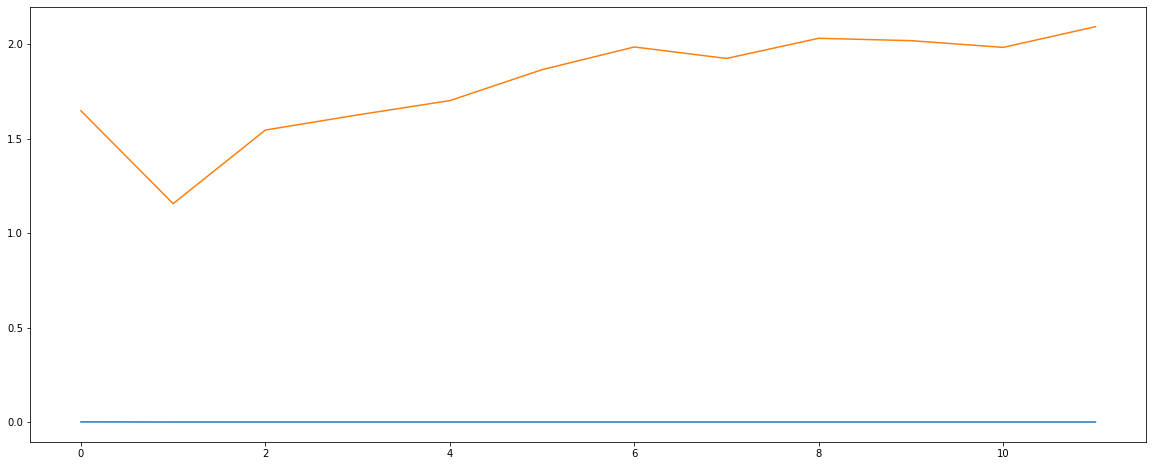

In [63]:
plt.figure(figsize=(20,8))
plt.plot(training)
plt.plot(testing)

In [65]:
X_test_tv = tv.transform(p).toarray()

In [66]:
nn.predict(X_test_tv)

1/1 [==============================] - 0s 70ms/step


array([[1.0000000e+00],
       [1.3802387e-18],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999857e-01],
       [1.0000000e+00],
       [1.6077222e-01],
       [6.5978178e-09],
       [1.9829292e-13],
       [9.9999994e-01],
       [1.6542845e-07],
       [3.4050998e-09],
       [9.9628943e-01],
       [5.4852349e-09],
       [9.7294968e-01],
       [1.1705283e-08],
       [1.2074407e-05]], dtype=float32)

In [67]:
output_tv = []
for i in pred:
    if i>0.5:
        output_tv.append(1)
    else:
        output_tv.append(0)
output_tv

[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [69]:
O['Like_tv'] = output_tv

In [70]:
O

,Review,like,Like_tv
0,Tasty and delicious,1,1
1,crust is hard,0,0
2,yummy....I like Dominos pizza,1,1
3,fast service and good taste,1,1
4,Good taste,1,1
5,Its very delicious... hope it will maintain ta...,1,1
6,Food was okay but the cheesy dip provided was ...,0,0
7,taste is ok but not satisfied,0,0
8,Poor service,0,0
9,Good hygiene food delivered by dominos with pr...,1,1
